# Messing With Pokemon Data

I've been interested in data analysis and data visualization for sometime now. I wasnt really sure how to start until I saw the reddit page r/data is beatiful I then noticed that they have monthly data visualization challenges. I then thought that this was a good chance to play with a data set aswell revist my childhood.

In [2]:
import pandas as pd #used to help pull in data from excel and creates tables
import numpy as np # for numerical analysis
import matplotlib.pyplot as plt # for plotting  
import seaborn as sns# like matplotlib but with prettier plots
import pandas as pd# controls and manipulates data within a data frame
import bqplot.pyplot as plt
from bqplot import *
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from pylab import figure, xlabel, ylabel,title
from IPython.display import display


In [3]:
pokemon = pd.read_csv('pokemon.csv') # second generation
pokemon.head()#show the first five rows in the data set to show that the dataframe is working

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [4]:
poketypes =  (['bug','dragon','ice','fighting','fire',
             'flying','grass','ghost','ground','electric',
             'normal','poison','psychic','rock','water',
             'dark','steel'])# list of attributes or types

In [5]:
def pokesoftype(attribute):#finds all the pokemon of a particular type 
    #attribute = input()
    type1 = pokemon['type1']
    type2 = pokemon['type2']
    name = pokemon['name']
    pot = []
    for i in range(0,100):
        if type1[i] == attribute:
            pot.append(name[i])
        if type2[i] == attribute:
            pot.append(name[i])
    return(pot)
    pot.clear()
def pokemonsrch(Name):# finds a pokemon of a particular name and their stats
    #Name = input()
    for i in range(0,len(pokemon['name'])):
        if Name.upper() == str(pokemon['name'][i]).upper():
            print(pokemon.iloc[i])
def on_button_clicked(b):
    pie.sizes = (pokemon['type1'].value_counts().sort_index())/100
    return True
def on_button_clicked_2(b):
    if pie.sizes[0] == pie.sizes[0]:
        with pie.hold_sync():#make pie a donut
            pie.radius = 180
            pie.inner_radius = 120



# Importing Data into Jupyter notebook

With the original data I made another excel spread sheet with seven different sheets each corresponding to a seperate pokemon generation. Since this is my first time manipulatining data like this I left some of the columns out. I left in coulums pertaining to name, attack, defense special attack, special defense, Hit points, height(meters), weight(kilograms), type, base total, and genertation.

Note: that these stats are base stats. Stats from when the pokemon has just been born or has just hatched from an egg and no leveling or training has been done.

Here I defined some funtion that would allow me to search the data simply by typing in the pokemons name or type

# Count of Pokemon Types 

In [6]:
data = pokemon['type1'].value_counts()/100

fig = plt.figure(animation_duration=2000)
pie = plt.pie(data, radius=180, sort=False, display_labels='outside', display_values=True,
          values_format='%', labels=(poketypes))
fig
#poketypes.str.count('water')
#pokemon2['type1'].value_counts().plot.bar();
#pokemon2['type2'].value_counts().sort_index().plot.bar()
#xlabel('Type');
#ylabel('Count');
#title('Frequncy of Type1');

Figure(animation_duration=2000, fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(m…

In [7]:
button = widgets.Button(description="Toggle Chart")
display(button)
button.on_click(on_button_clicked)
button.on_click(on_button_clicked_2)

Button(description='Toggle Chart', style=ButtonStyle())

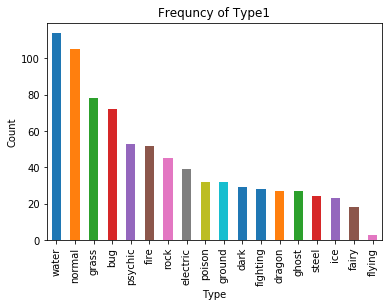

In [8]:
pokemon['type1'].value_counts().plot.bar();
#pokemon2['type2'].value_counts().sort_index().plot.bar()
xlabel('Type');
ylabel('Count');
title('Frequncy of Type1');

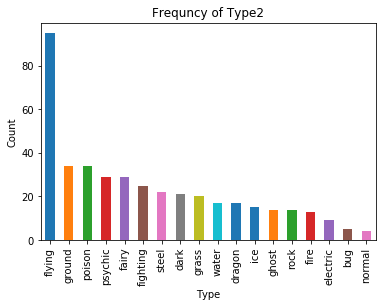

In [9]:
pokemon['type2'].value_counts().plot.bar();
#pokemon2['type2'].value_counts().sort_index().plot.bar()
xlabel('Type');
ylabel('Count');
title('Frequncy of Type2');

# Correlations between pokemon stats in the Second Generation

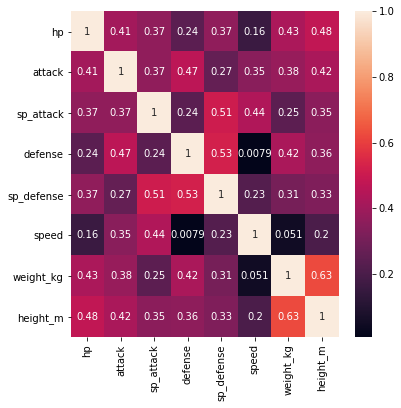

In [10]:
figure(figsize = (6,6))
w = sns.heatmap(
    pokemon.loc[:,['hp', 'attack', 'sp_attack', 'defense', 'sp_defense', 'speed','weight_kg','height_m']].corr(),
    annot=True
)

# Scatter plots

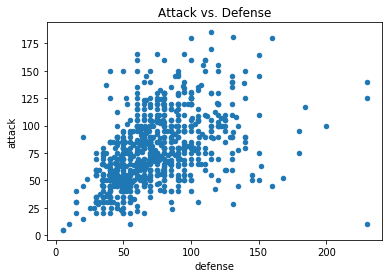

In [11]:
pokemon.plot.scatter(x='defense', y='attack',title = 'Attack vs. Defense');

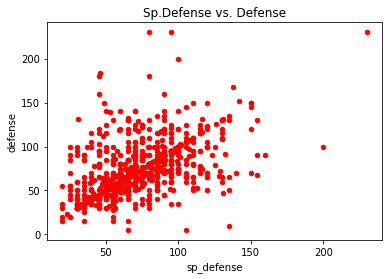

In [12]:
pokemon.plot.scatter(x = 'sp_defense', y = 'defense', title = 'Sp.Defense vs. Defense', color = 'red');

In [13]:
def HP(lvl,IV,EV, name):
    base =0
    for i in range(0,len(pokemon['name'])):
        if name.upper() == str(pokemon['name'][i]).upper():
            base= pokemon.iloc[i]['hp']
    x = base*2 + IV
    y = int(EV/4)
    hp = int(((x+y)/100)*lvl)+lvl+10
    return (hp)

In [14]:
interact(HP, lvl = (0,100,1),IV = (0,31,  1),EV = (0,252, 1), name  = input())

Pikachu


interactive(children=(IntSlider(value=50, description='lvl'), IntSlider(value=15, description='IV', max=31), I…

<function __main__.HP(lvl, IV, EV, name)>